### Notebook to read NIfTY files

In [2]:
import nibabel as nib
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import pandas as pd

### read fMRI data (data with 4th dimension = time)

<class 'nibabel.nifti1.Nifti1Image'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   91  109   91 1200    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'conn_matc2nii'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffs

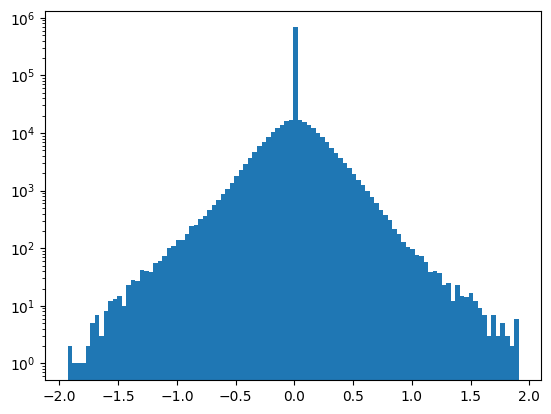

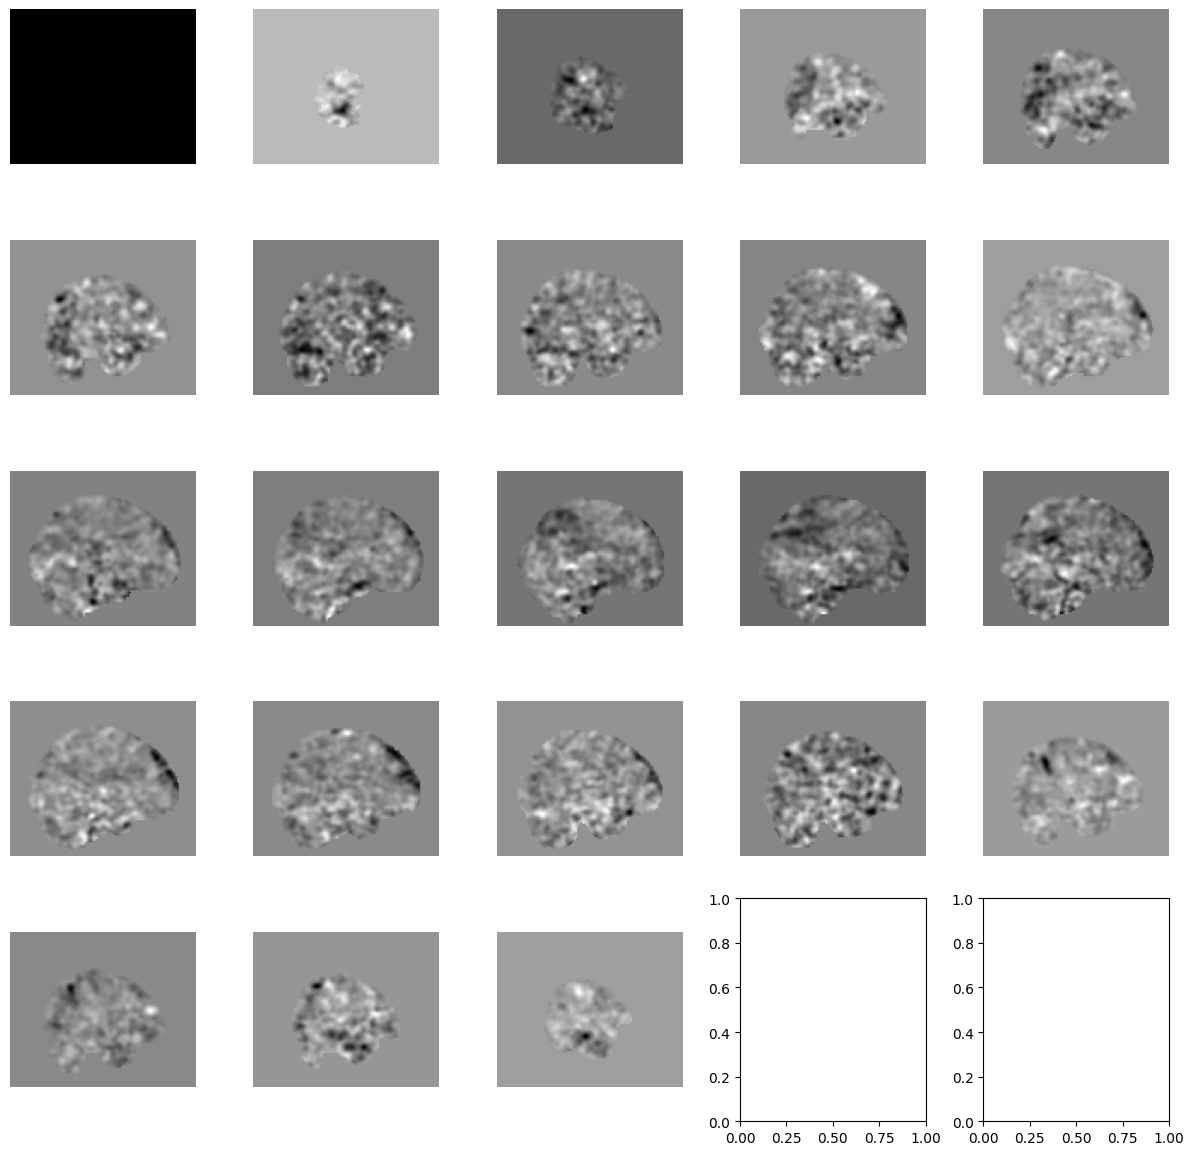

In [3]:
file_path = "../../data/Denoised_Data_6mm"

# # fMRI file
path_content = os.listdir(file_path)
brain_vol = nib.load(os.path.join(file_path, path_content[-1]))

# What is the type of this object?
print(type(brain_vol))

print(brain_vol.header)

brain_vol_data = brain_vol.get_fdata()
print(type(brain_vol_data))
print(brain_vol_data.shape)

brain_vol_data = brain_vol_data[:,:,:,300]  # 300th time point for fMRI data set
print(f"max of brain vol data: {brain_vol_data.max()}")
brain_vol_data[0,0,0] = brain_vol_data.max()

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

print(brain_vol_data.shape)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx].axis("off")

plt.tight_layout()
plt.show()

<class 'nibabel.nifti1.Nifti1Image'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
sr

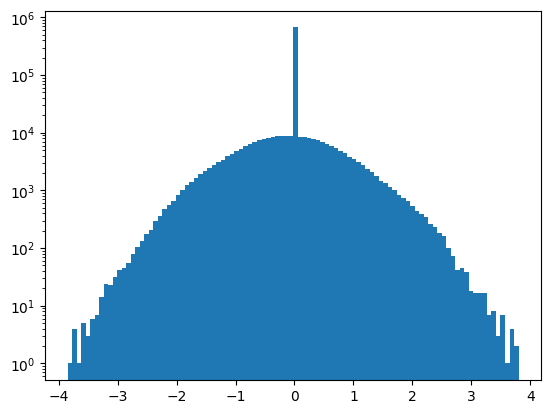

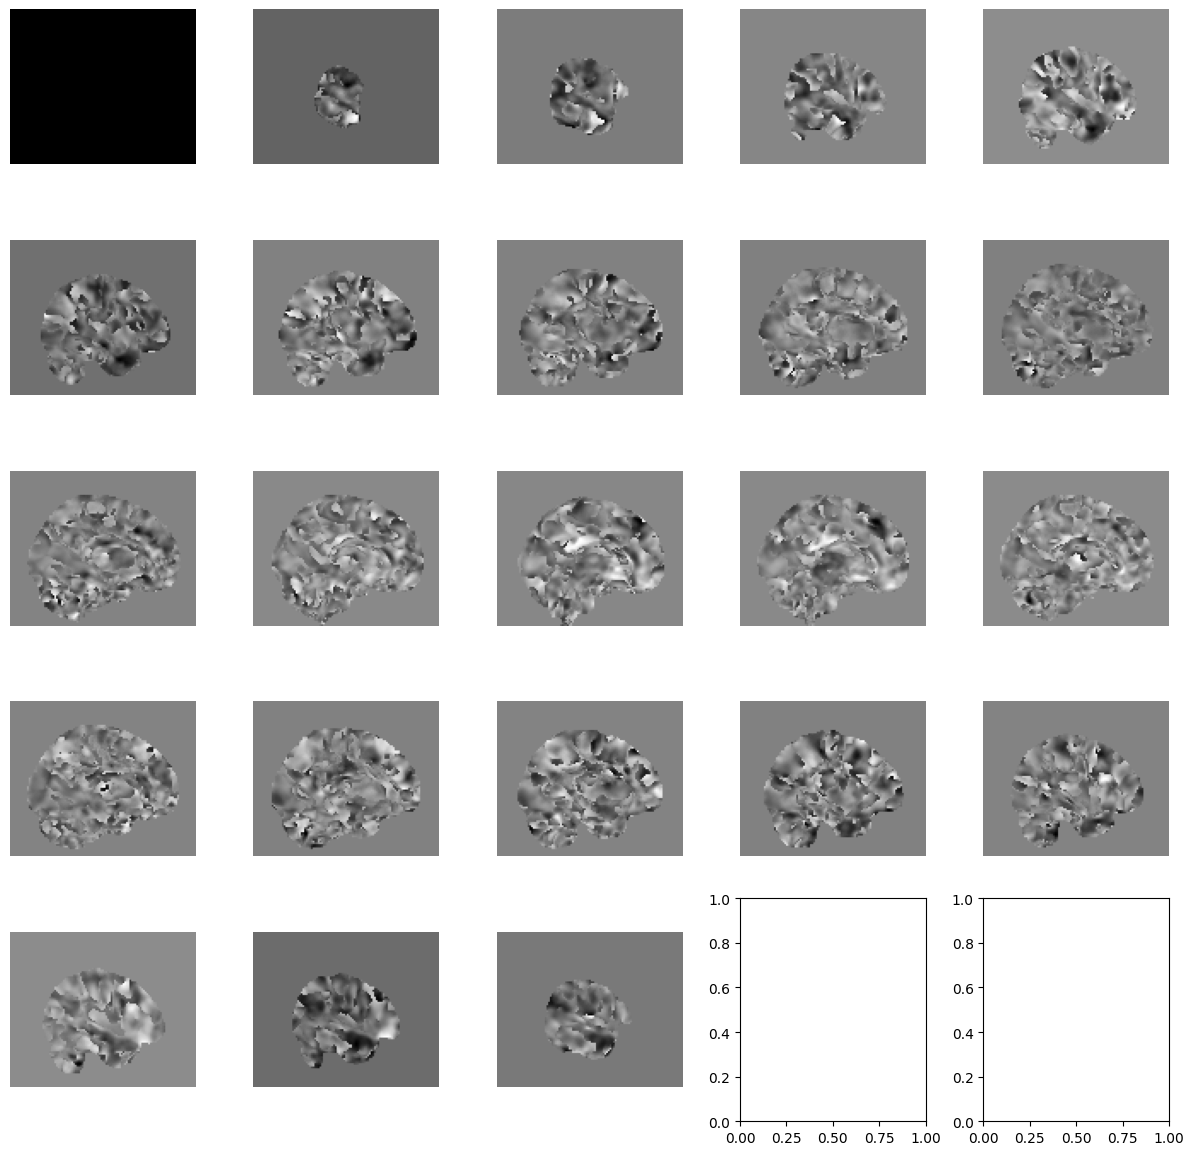

In [4]:
file_path = "../../data/"

# MVPA data
path_content = os.listdir(os.path.join(file_path, "Denoised_MVPA_8mm"))
brain_vol = nib.load(os.path.join(file_path, "Denoised_MVPA_8mm", path_content[0]))

# What is the type of this object?
print(type(brain_vol))

print(brain_vol.header)

brain_vol_data = brain_vol.get_fdata()
print(type(brain_vol_data))
print(brain_vol_data.shape)

brain_vol_data = brain_vol_data[:, :, :]
print(f"max of brain vol data: {brain_vol_data.max()}")
brain_vol_data[0,0,0] = brain_vol_data.max()

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

print(brain_vol_data.shape)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx].axis("off")

plt.tight_layout()
plt.show()

<class 'nibabel.nifti1.Nifti1Image'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x 

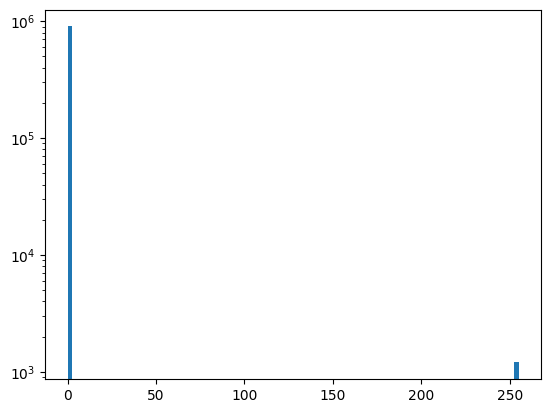

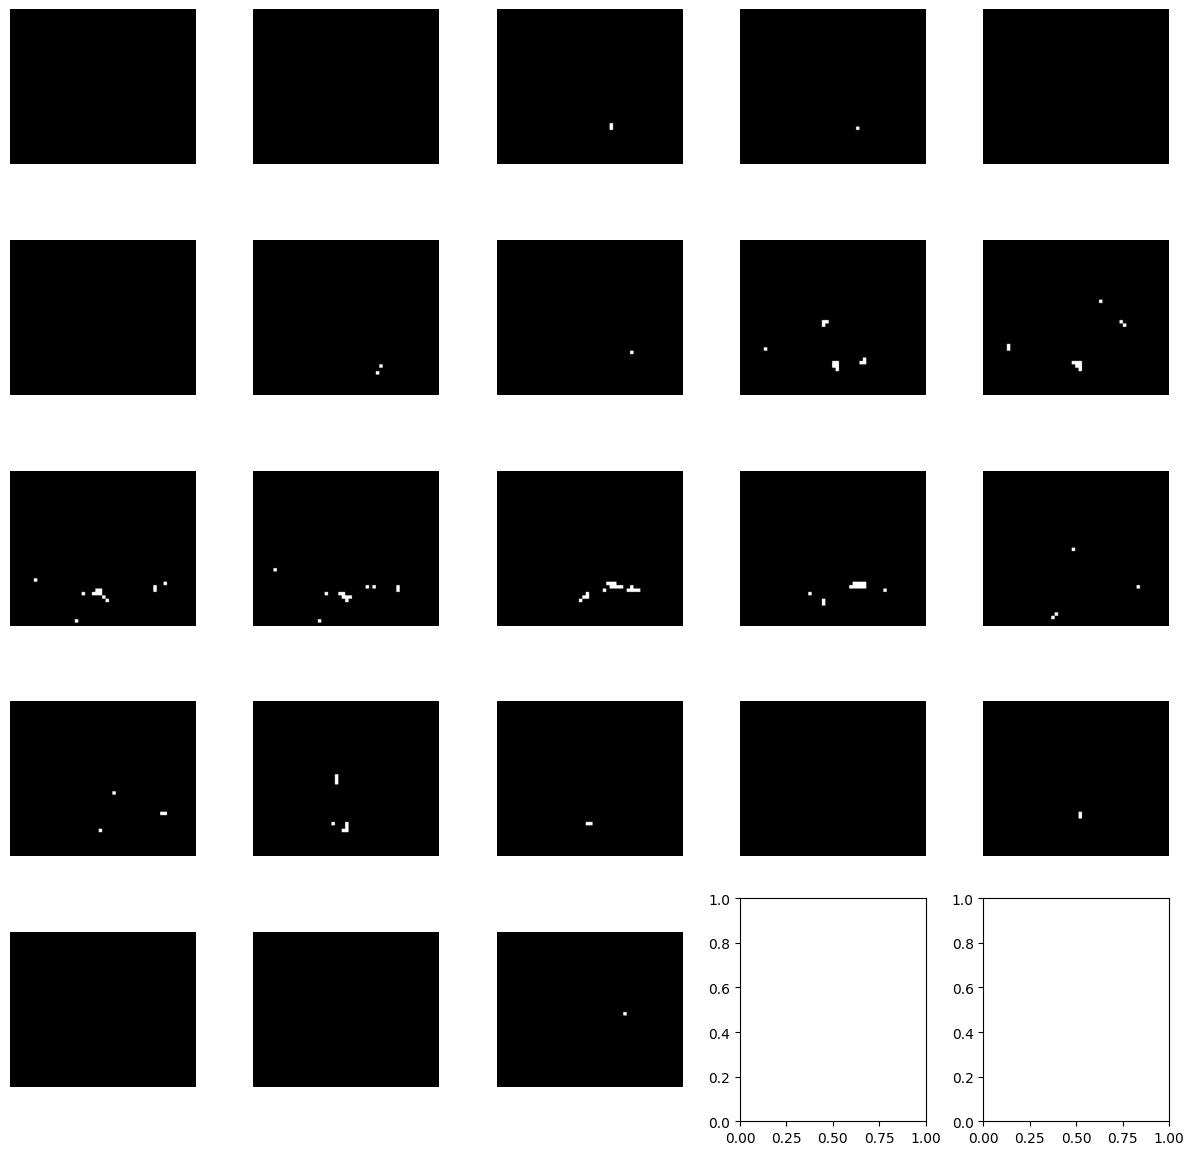

In [5]:
file_path = "../../data/"

# Print Mask Test
brain_vol = nib.load(os.path.join(file_path, "mask_test_RC2_F150.nii"))

# What is the type of this object?
print(type(brain_vol))

print(brain_vol.header)

brain_vol_data = brain_vol.get_fdata()
print(type(brain_vol_data))
print(brain_vol_data.shape)

# brain_vol_data = brain_vol_data[:,:,:,300]  # 300th time point for fMRI data set
brain_vol_data = brain_vol_data[:, :, :]
print(f"max of brain vol data: {brain_vol_data.max()}")
brain_vol_data[0,0,0] = brain_vol_data.max()

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

print(brain_vol_data.shape)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx].axis("off")

plt.tight_layout()
plt.show()


